<a href="https://colab.research.google.com/github/mak4x13/Machine-Learning/blob/main/Heart_disease_prediction_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Heart.csv')
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
# df.drop('Unnamed: 0', axis=1, inplace=True)
meanCa = df['Ca'].median()
medThal = df['Thal'].mode()[0]

# df['Ca'].fillna(meanCa, inplace=True)
df['Thal'].fillna(medThal, inplace=True)

df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


Text(0.5, 1.0, 'Age-Cholestrol')

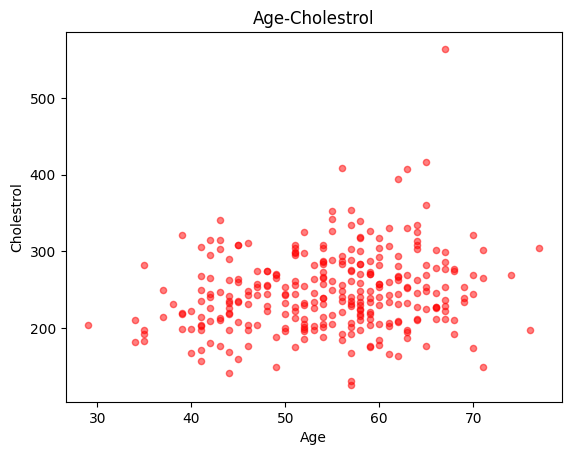

In [ ]:
df.plot(kind='scatter', x='Age', y='Chol', alpha=0.5, color='red')
plt.xlabel('Age')
plt.ylabel('Cholestrol')
plt.title('Age-Cholestrol')

In [ ]:
df_new = pd.get_dummies(df, columns=['ChestPain', 'Thal'], drop_first=True)
# df_new.head()

In [ ]:
X = df_new.drop('AHD', axis=1)
y = df['AHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0
Oldpeak,0


In [ ]:
from sklearn.model_selection import GridSearchCV

model = svm.SVC()

para_grid = {'C': [1,10,100,1000], 'gamma':[1,0.1,0.01, 0.001], 'kernel':['rbf']}

grid = GridSearchCV(model, para_grid, n_jobs=-1, verbose=1, refit=True, cv=5)

grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
print("Best param: ", grid_search.best_params_)

Best param:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
accuracy = grid.best_score_
accuracy

0.6696428571428571

In [ ]:
print('Confusion Matrix: \n', confusion_matrix(y_test, grid.predict(X_test)))
print('Classification Report: \n', classification_report(y_test, grid.predict(X_test)))

Confusion Matrix: 
 [[27  7]
 [11 16]]
Classification Report: 
               precision    recall  f1-score   support

          No       0.71      0.79      0.75        34
         Yes       0.70      0.59      0.64        27

    accuracy                           0.70        61
   macro avg       0.70      0.69      0.70        61
weighted avg       0.70      0.70      0.70        61

